In [1]:
## Cargamos paquetes
import os
import pandas as pd
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
import rioxarray as rxr
import numpy as np
import fiona
import rasterio.mask


In [2]:
## Función que construye directorio de datos
def build_path(PATH):
    return os.path.abspath(os.path.join(*PATH))

## Ruta del notebook
FILE_PATH = os.getcwd()

## Ruta de los rasters
DATA_PATH = build_path(["..", "..", "data", "reto"])
RASTER_PATH = build_path([DATA_PATH, "rasters"])
BIOCLIM_PATH = build_path([RASTER_PATH, "WorldClim", "BioClim"])
CLIM_PATH = build_path([RASTER_PATH, "WorldClim", "Climate"])
EARTH_ENV_LAND_COVER_PATH = build_path([RASTER_PATH, "EarthEnv", "LandCover", "without_DISCover"])
SRAD_CLIM_PATH = build_path([CLIM_PATH, "srad"])
WIND_CLIM_PATH = build_path([CLIM_PATH, "wind"])

## Ruta de las power plants
POWER_PLANTS_PATH = build_path([DATA_PATH, "global_power_plants"])

## Ruta de los polígonos de paises
COUNTRIES_PATH = build_path([DATA_PATH, "countries"])

## Ruta de Localidades
LOCALIDADES_ETCHOJOA_PATH = build_path([DATA_PATH, "localidades", "localidades_etchojoa.geojson"])
LOCALIDADES_GUACHOCHI_PATH = build_path([DATA_PATH, "localidades", "localidades_guachochi.geojson"])
LOCALIDADES_TRINITARIA_PATH = build_path([DATA_PATH, "localidades", "localidades_la_trinitaria.geojson"])

## Ruta de polígonos de los casos de estudio
CASOS_ESTUDIO_PATH = build_path([DATA_PATH, "casos_estudio"])
CHIAPAS_PATH = build_path([CASOS_ESTUDIO_PATH, "chiapas"])
SONORA_PATH = build_path([CASOS_ESTUDIO_PATH, "sonora"])
CHIHUAHUA_PATH = build_path([CASOS_ESTUDIO_PATH, "chihuahua"])

## Carguemos un archivo Raster para visualizarlo

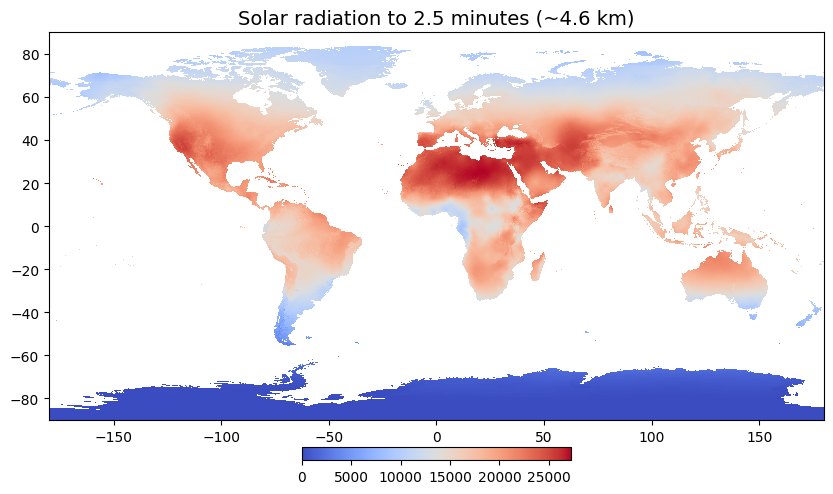

In [3]:
## Cargamos el raster de WorldClim de radiación solar

### Construye ruta
SRAD_FP = build_path([RASTER_PATH, "WorldClim", "Climate", "srad", "wc2.1_2.5m_srad_08.tif"])

### Carga raster
raster = rxr.open_rasterio(SRAD_FP, mask_and_scale=True)

### Selecciona datos en banda 1
raster =  raster.sel(band=1)

### Grafica el raster
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax,  add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)

ax.set_title('Solar radiation to 2.5 minutes (~4.6 km)', fontsize = 14)
ax.set_aspect('equal')
plt.show()

## Carguemos datos de Power Plants

In [4]:
## Construye ruta
PP_FP = build_path([POWER_PLANTS_PATH, "global_power_plant_database.csv"]) 

## Cargamos los datos con pandas
plantas = pd.read_csv(PP_FP)

## Extraemos la ubicación en longitud y latitud de las plantas para construir el geo Data Frame
geometry = gpd.points_from_xy(plantas.longitude, plantas.latitude)

gdf = gpd.GeoDataFrame(plantas, crs='EPSG:4326', geometry=geometry)
gdf


/tmp/ipykernel_1656162/3742212284.py:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  plantas = pd.read_csv(PP_FP)


country country_long                                               name  \
0         AFG  Afghanistan       Kajaki Hydroelectric Power Plant Afghanistan   
1         AFG  Afghanistan                                       Kandahar DOG   
2         AFG  Afghanistan                                       Kandahar JOL   
3         AFG  Afghanistan      Mahipar Hydroelectric Power Plant Afghanistan   
4         AFG  Afghanistan   Naghlu Dam Hydroelectric Power Plant Afghanistan   
...       ...          ...                                                ...   
34931     ZMB       Zambia                                              Ndola   
34932     ZMB       Zambia                                              Nkana   
34933     ZMB       Zambia                                     Victoria Falls   
34934     ZWE     Zimbabwe                   Hwange Coal Power Plant Zimbabwe   
34935     ZWE     Zimbabwe  Kariba Dam South Hydroelectric Power Station Z...   

          gppd_idnr  capacity_mw  latitude  longitude primary_fuel  \
0      GEODB0040538         33.0   32.3220    65.1190        Hydro   
1        WKS0070144         10.0   31.6700    65.7950        Solar   
2        WKS0071196         10.0   31.6230    65.7920        Solar   
3      GEODB0040541         66.0   34.5560    69.4787        Hydro   
4      GEODB0040534        100.0   34.6410    69.7170        Hydro   
...             ...          ...       ...        ...          ...   
34931    WRI1022386         50.0  -12.9667    28.6333          Oil   
34932    WRI1022384         20.0  -12.8167    28.2000          Oil   
34933    WRI1022380        108.0  -17.9167    25.8500        Hydro   
34934  GEODB0040404        920.0  -18.3835    26.4700         Coal   
34935  GEODB0003803        750.0  -16.5222    28.7619        Hydro   

      other_fuel1 other_fuel2  ... estimated_generation_gwh_2014  \
0             NaN         NaN  ...                        162.90   
1             NaN         NaN  ...                         17.48   
2             NaN         NaN  ...                         17.58   
3             NaN         NaN  ...                        203.55   
4             NaN         NaN  ...                        357.22   
...           ...         ...  ...                           ...   
34931         NaN         NaN  ...                           NaN   
34932         NaN         NaN  ...                           NaN   
34933         NaN         NaN  ...                        575.78   
34934         NaN         NaN  ...                           NaN   
34935         NaN         NaN  ...                       3999.75   

       estimated_generation_gwh_2015 estimated_generation_gwh_2016  \
0                              97.39                        137.76   
1                              18.25                         17.70   
2                              19.10                         17.62   
3                             146.90                        230.18   
4                             270.99                        395.38   
...                              ...                           ...   
34931                            NaN                           NaN   
34932                            NaN                           NaN   
34933                         548.94                        579.90   
34934                            NaN                           NaN   
34935                        3745.02                       3428.65   

      estimated_generation_gwh_2017 estimated_generation_note_2013  \
0                            119.50                       HYDRO-V1   
1                             18.29                SOLAR-V1-NO-AGE   
2                             18.72                SOLAR-V1-NO-AGE   
3                            174.91                       HYDRO-V1   
4                            350.80                       HYDRO-V1   
...                             ...                            ...   
34931                        183.79         

In [5]:
## Haremos un subset para quedarnos con los registros de plantas solares o eólicas
energia = "Solar" # "Wind" si queremos quedarnos con las plantas eólicas
gdf_energia = gdf.query(f"primary_fuel == '{energia}'")
gdf_energia


country country_long                name   gppd_idnr  capacity_mw  \
1         AFG  Afghanistan        Kandahar DOG  WKS0070144         10.0   
2         AFG  Afghanistan        Kandahar JOL  WKS0071196         10.0   
17        DZA      Algeria               Adrar  WKS0068905         20.0   
18        DZA      Algeria            Ain Azel  WKS0065285         20.0   
20        DZA      Algeria        Ain Sekhouna  WKS0068919         20.0   
...       ...          ...                 ...         ...          ...   
34833     VNM      Vietnam      Ninh Thuận CMX  WKS0067920        168.0   
34847     VNM      Vietnam           Phước Nam  WKS0071353        330.0   
34894     VNM      Vietnam  Thua Thien Hue TTC  WKS0073963         48.0   
34895     VNM      Vietnam           Thuan Bac  WKS0072323        204.0   
34921     ZMB       Zambia               Kafue  WKS0066036         47.5   

       latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
1        31.670     65.795        Solar         NaN         NaN  ...   
2        31.623     65.792        Solar         NaN         NaN  ...   
17       27.908     -0.317        Solar         NaN         NaN  ...   
18       35.880      5.475        Solar         NaN         NaN  ...   
20       34.532      0.804        Solar         NaN         NaN  ...   
...         ...        ...          ...         ...         ...  ...   
34833    11.700    108.900        Solar         NaN         NaN  ...   
34847    11.446    108.866        Solar         NaN         NaN  ...   
34894    16.440    107.505        Solar         NaN         NaN  ...   
34895    11.700    109.030        Solar         NaN         NaN  ...   
34921   -15.550     28.350        Solar         NaN         NaN  ...   

      estimated_generation_gwh_2014  estimated_generation_gwh_2015  \
1                             17.48                          18.25   
2                             17.58                          19.10   
17                            35.22                          34.22   
18                            38.68                          37.56   
20                            34.85                          33.67   
...                             ...                            ...   
34833                        346.18                         381.66   
34847                        672.49                         728.74   
34894                         92.05                          98.76   
34895                        419.98                         463.11   
34921                        131.38                         130.81   

      estimated_generation_gwh_2016 estimated_generation_gwh_2017  \
1                             17.70                         18.29   
2                             17.62                         18.72   
17                            35.33                         35.17   
18                            38.37                         38.75   
20                            34.54                         35.46   
...                             ...                           ...   
34833                        324.99                        283.13   
34847                        626.62                        576.93   
34894                         85.27                         78.68   
34895                        394.00                        340.91   
34921                        133.81                        121.28   

      estimated_generation_note_2013 estimated_generation_note_2014  \
1                    SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
2                    SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17                     NO-ESTIMATION                SOLAR-V1-NO-AGE   
18                     NO-ESTIMATION                SOLAR-V1-NO-AGE   
20                     NO-ESTIMATION                SOLAR-V1-NO-AGE   
...                              ...                            ...   
34833                SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
34

Text(0.5, 1.0, 'Distribución de Plantas de energía Solar')

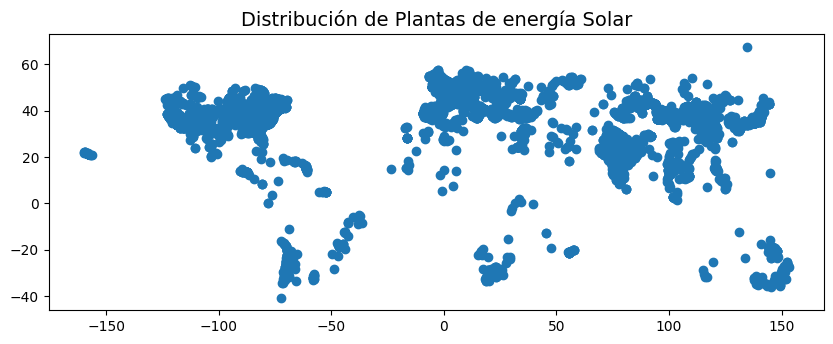

In [6]:
## Visualizamos la distribución de plantas en el mundo
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

gdf_energia.plot( ax=ax)

ax.set_title(f'Distribución de Plantas de energía {energia}', fontsize = 14)


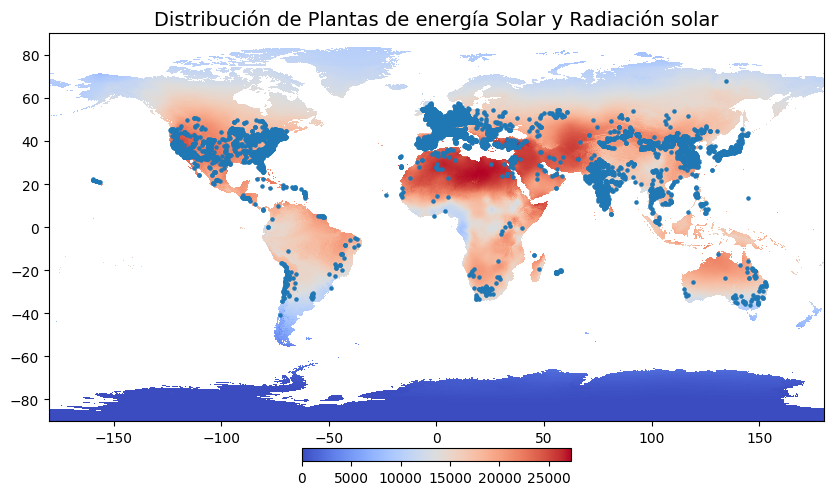

In [7]:
### Traslapemos los puntos de plantas de energía sobre el raster de radiación solar

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax, add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)
gdf_energia.plot(ax=ax, markersize=5)
ax.set_xlim([raster.x.min(), raster.x.max()])
ax.set_ylim([raster.y.min(), raster.y.max()])
ax.set_title(f'Distribución de Plantas de energía {energia} y Radiación solar', fontsize = 14)
ax.set_aspect('equal')

plt.show()

## Sampling Raster Values

Vamos a extraer el valor de los pixeles del raster en cada punto geográfico de las plantas de poder. El método `sel()` de Xarray permite extraer el valor del pixel para un punto en específico.

In [8]:
## Convertimos las coordenadas a DataArray
x_coords = gdf.geometry.x.to_xarray()
y_coords = gdf.geometry.y.to_xarray()

## Obtenemos el valor del pixel para esas coordenadas
## Dado que los pixeles del raster no están localizados en el punto exacto de las coordenadas X-Y, 
## usamos method='nearest' para tomar el pixel más cercano a la planta
sampled = raster.sel(x=x_coords, y=y_coords, method='nearest')


In [9]:
## Agregamos el valor del pixel como una columna de nuestro geo Data Frame
gdf_energia.loc[:, 'srad'] = sampled.to_series()
gdf_energia

/home/milo/anaconda3/envs/reto-ltp/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


country country_long                name   gppd_idnr  capacity_mw  \
1         AFG  Afghanistan        Kandahar DOG  WKS0070144         10.0   
2         AFG  Afghanistan        Kandahar JOL  WKS0071196         10.0   
17        DZA      Algeria               Adrar  WKS0068905         20.0   
18        DZA      Algeria            Ain Azel  WKS0065285         20.0   
20        DZA      Algeria        Ain Sekhouna  WKS0068919         20.0   
...       ...          ...                 ...         ...          ...   
34833     VNM      Vietnam      Ninh Thuận CMX  WKS0067920        168.0   
34847     VNM      Vietnam           Phước Nam  WKS0071353        330.0   
34894     VNM      Vietnam  Thua Thien Hue TTC  WKS0073963         48.0   
34895     VNM      Vietnam           Thuan Bac  WKS0072323        204.0   
34921     ZMB       Zambia               Kafue  WKS0066036         47.5   

       latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
1        31.670     65.795        Solar         NaN         NaN  ...   
2        31.623     65.792        Solar         NaN         NaN  ...   
17       27.908     -0.317        Solar         NaN         NaN  ...   
18       35.880      5.475        Solar         NaN         NaN  ...   
20       34.532      0.804        Solar         NaN         NaN  ...   
...         ...        ...          ...         ...         ...  ...   
34833    11.700    108.900        Solar         NaN         NaN  ...   
34847    11.446    108.866        Solar         NaN         NaN  ...   
34894    16.440    107.505        Solar         NaN         NaN  ...   
34895    11.700    109.030        Solar         NaN         NaN  ...   
34921   -15.550     28.350        Solar         NaN         NaN  ...   

      estimated_generation_gwh_2015  estimated_generation_gwh_2016  \
1                             18.25                          17.70   
2                             19.10                          17.62   
17                            34.22                          35.33   
18                            37.56                          38.37   
20                            33.67                          34.54   
...                             ...                            ...   
34833                        381.66                         324.99   
34847                        728.74                         626.62   
34894                         98.76                          85.27   
34895                        463.11                         394.00   
34921                        130.81                         133.81   

      estimated_generation_gwh_2017 estimated_generation_note_2013  \
1                             18.29                SOLAR-V1-NO-AGE   
2                             18.72                SOLAR-V1-NO-AGE   
17                            35.17                  NO-ESTIMATION   
18                            38.75                  NO-ESTIMATION   
20                            35.46                  NO-ESTIMATION   
...                             ...                            ...   
34833                        283.13                SOLAR-V1-NO-AGE   
34847                        576.93                SOLAR-V1-NO-AGE   
34894                         78.68                SOLAR-V1-NO-AGE   
34895                        340.91                SOLAR-V1-NO-AGE   
34921                        121.28                SOLAR-V1-NO-AGE   

      estimated_generation_note_2014 estimated_generation_note_2015  \
1                    SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
2                    SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
17                   SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
18                   SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
20                   SOLAR-V1-NO-AGE                SOLAR-V1-NO-AGE   
...                              ...                            ...   
34833                SOLAR-V1-NO-AGE                SOLAR-V1-

## Agreguemos Pseudo-Ausencias

Conocemos los puntos donde existen plantas de energía, pero no las ubicaciones donde definitivamente no hay presencia. En la práctica de Modelación de Distribución de Especies es común datos artificiales de pseudo-ausencias. 

Sin embargo, es importante reconocer las limitaciones y los posibles errores de este método, ya que los puntos de pseudoausencia generados artificialmente podrían no reflejar con precisión las áreas de ausencia reales.

Para un debate sobre el tema:
* [Selecting pseudo-absences for species distribution models: how, where and how many?](https://besjournals.onlinelibrary.wiley.com/doi/full/10.1111/j.2041-210X.2011.00172.x)

In [10]:
### Cargamos los datos de pseudoausencias de las plantas solares y de viento

## Definimos rutas
PA_POWER_PLANTS_PATH = build_path([DATA_PATH, "pseudo_ausencias_global_power_plants"])
PA_SOLAR_FP = build_path([PA_POWER_PLANTS_PATH, "pseudo_ausencias_solar.csv"])
PA_VIENTO_FP = build_path([PA_POWER_PLANTS_PATH, "pseudo_ausencias_viento.csv"])

## Cargamos datos
pa_pp_solar = pd.read_csv(PA_SOLAR_FP) 
pa_pp_viento = pd.read_csv(PA_VIENTO_FP) 

## Los convertimos a geo data frame
gdf_pa_solar = gpd.GeoDataFrame(pa_pp_solar, 
                                crs='EPSG:4326', 
                                geometry=gpd.points_from_xy(pa_pp_solar.longitude, pa_pp_solar.latitude))

gdf_pa_viento = gpd.GeoDataFrame(pa_pp_viento, 
                                crs='EPSG:4326', 
                                geometry=gpd.points_from_xy(pa_pp_viento.longitude, pa_pp_viento.latitude))



<Axes: >

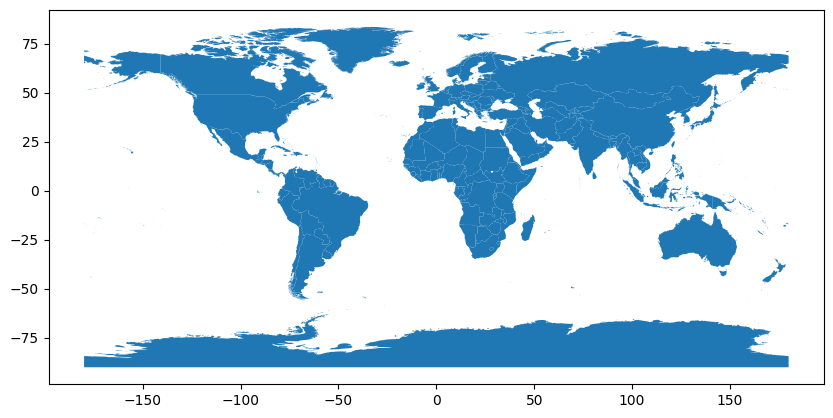

In [15]:
## Corta puntos dento de los polígonos de los paises
COUNTRIES_FP = build_path([COUNTRIES_PATH, "ne_10m_admin_0_countries_ind.geojson"])
countries = gpd.read_file(COUNTRIES_FP)
countries.plot(figsize = (10,10))

<Axes: >

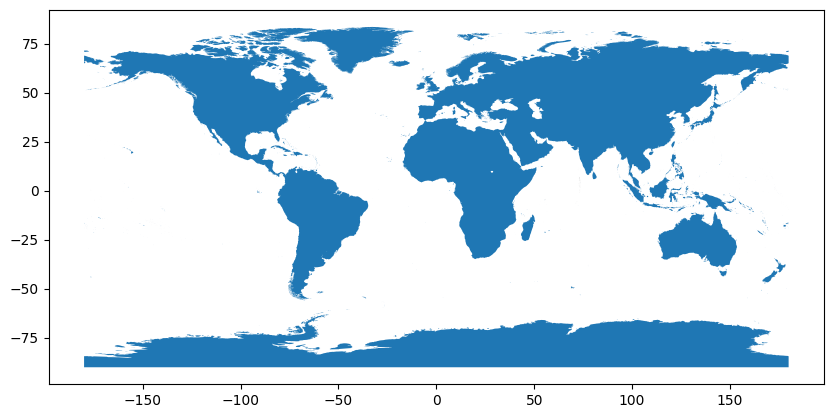

In [16]:
### Creamos un solo polígono del mundo
countries["agrega"] = "mundo"
mundo = countries.dissolve(by='agrega')
mundo.plot(figsize = (10,10))

In [13]:
## Nos quedamos con los puntos dentro del polígono de mundo
gdf_pa_viento = gdf_pa_viento[[mundo.contains(i)["mundo"] for i in gdf_pa_viento.geometry ]]
gdf_pa_solar = gdf_pa_solar[[mundo.contains(i)["mundo"] for i in gdf_pa_solar.geometry ]]

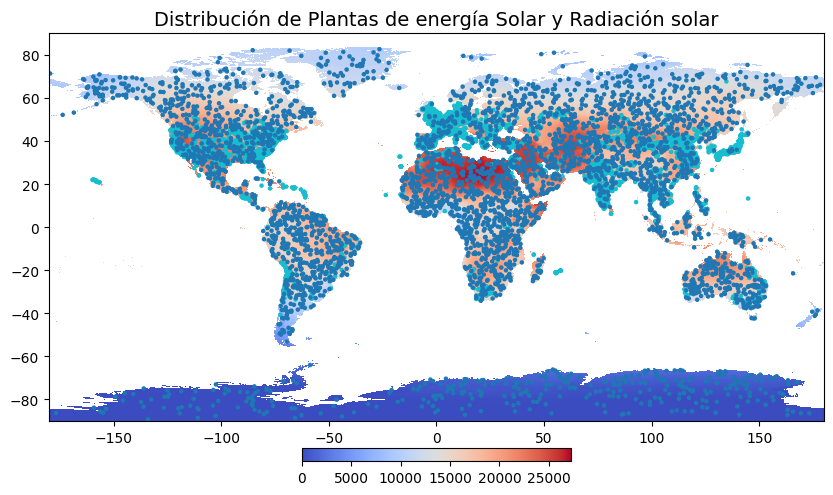

In [17]:
### Visualizamos Presencias y Pseudo-Ausencias
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax, add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)
gdf_pa_solar.plot(column='presencia', categorical=True, ax=ax, markersize=5)
ax.set_xlim([raster.x.min(), raster.x.max()])
ax.set_ylim([raster.y.min(), raster.y.max()])
ax.set_title(f'Distribución de Plantas de energía {energia} y Radiación solar', fontsize = 14)
ax.set_aspect('equal')

plt.show()

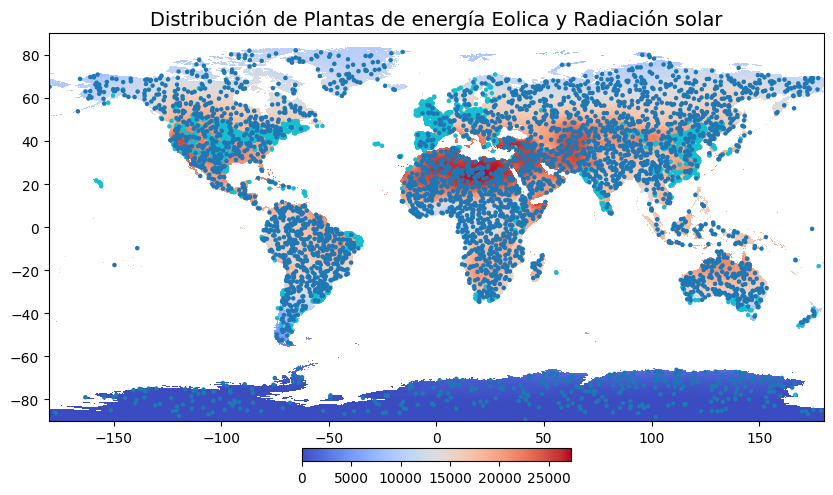

In [18]:
### Visualizamos Presencias y Pseudo-Ausencias
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax, add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)
gdf_pa_viento.plot(column='presencia', categorical=True, ax=ax, markersize=5)
ax.set_xlim([raster.x.min(), raster.x.max()])
ax.set_ylim([raster.y.min(), raster.y.max()])
ax.set_title('Distribución de Plantas de energía Eolica y Radiación solar', fontsize = 14)
ax.set_aspect('equal')

plt.show()

## Regresión Logística para estimar la probabilidad de presencia de una planta de poder dado el paisaje

## Python module for geospatial prediction using scikit-learn and rasterio

In [19]:
from pyimpute import load_training_vector, load_targets, impute, evaluate_clf
from sklearn.ensemble import RandomForestClassifier

# Guardamos nuestros data frames como geojson para que sean procesados 
DATA_MODEL_PATH = build_path([DATA_PATH, "pyimpute_data"])
DATA_VIENTO_PA = build_path([DATA_MODEL_PATH, "pa_viento_to_model.geojson"])
DATA_SOLAR_PA = build_path([DATA_MODEL_PATH, "pa_solar_to_model.geojson"])

# Guardamos los dataframes como geojson
gdf_pa_viento.to_file(DATA_VIENTO_PA, driver="GeoJSON")
gdf_pa_solar.to_file(DATA_SOLAR_PA, driver="GeoJSON")


In [20]:
# Load some training data

explanatory_rasters = [
            build_path([BIOCLIM_PATH, "wc2.1_2.5m_bio_1.tif"]), # Annual Mean Temperature
            build_path([BIOCLIM_PATH, "wc2.1_2.5m_bio_3.tif"]), # Isothermality (BIO2/BIO7) (×100)
            build_path([BIOCLIM_PATH, "wc2.1_2.5m_bio_4.tif"]), # Max Temperature of Warmest Month
            build_path([BIOCLIM_PATH, "wc2.1_2.5m_bio_5.tif"]), # Min Temperature of Coldest Month
            build_path([BIOCLIM_PATH, "wc2.1_2.5m_bio_12.tif"]), # Annual Precipitation
            build_path([SRAD_CLIM_PATH, "wc2.1_2.5m_srad_08.tif"]), # Solar radiation
            build_path([WIND_CLIM_PATH, "wc2.1_2.5m_wind_08.tif"]), # Wind
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_1.tif"]), # Evergreen/Deciduous Needleleaf Trees ---> Árboles de hoja perenne/caducifolios de hojas aciculares
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_2.tif"]), # Evergreen Broadleaf Trees 	---> Árboles de hoja ancha de hoja perenne
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_3.tif"]), # Deciduous Broadleaf Trees 	---> Árboles de hoja ancha de hoja caduca
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_4.tif"]), # Mixed/Other Trees 	---> Árboles mixtos/otros
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_7.tif"]), # Cultivated and Managed Vegetation 	---> Vegetación cultivada y gestionada
            build_path([EARTH_ENV_LAND_COVER_PATH, "Consensus_reduced_class_9.tif"]), # Urban/Built-up 	---> Urbana / Construida
]

## Train a scikit-learn classifier
train_xs, train_y = load_training_vector(DATA_SOLAR_PA,
                                         explanatory_rasters,
                                         response_field="presencia")

train_viento_xs, train_viento_y = load_training_vector(DATA_VIENTO_PA,
                                         explanatory_rasters,
                                         response_field="presencia")

In [21]:
# import machine learning classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

CLASS_MAP = {
    'rf': (RandomForestClassifier()),
    'et': (ExtraTreesClassifier()),
    'xgb': (XGBClassifier()),
    }

from pyimpute import impute
from sklearn import model_selection

## Ajustamos el modelo para energia solar

# model fitting and spatial range prediction
print("ENTRENANDO MODELO ENERGIA SOLAR")
best_solar_model = None
precision_solar = 0.0

for name, (model) in CLASS_MAP.items():
    # cross validation for accuracy scores (displayed as a percentage)
    k = 10 # k-fold
    kf = model_selection.KFold(n_splits=k)
    accuracy_scores = model_selection.cross_val_score(model, train_xs, train_y, cv=kf, scoring='accuracy')
    print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
          % (k, accuracy_scores.mean() * 100, accuracy_scores.std() * 200))
    if accuracy_scores.mean()>precision_solar:
        precision_solar = accuracy_scores.mean()
        best_solar_model = model
        best_solar_model.fit(train_xs, train_y)
        

# model fitting and spatial range prediction
print("ENTRENANDO MODELO ENERGIA EÓLICA")
best_viento_model = None
precision_viento = 0.0

for name, (model) in CLASS_MAP.items():
    # cross validation for accuracy scores (displayed as a percentage)
    k = 10 # k-fold
    kf = model_selection.KFold(n_splits=k)
    accuracy_scores = model_selection.cross_val_score(model, train_viento_xs, train_viento_y, cv=kf, scoring='accuracy')
    print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
          % (k, accuracy_scores.mean() * 100, accuracy_scores.std() * 200))
    if accuracy_scores.mean()>precision_viento:
        precision_viento = accuracy_scores.mean()
        best_viento_model = model
        best_viento_model.fit(train_xs, train_y)
        

ENTRENANDO MODELO ENERGIA SOLAR
rf 10-fold Cross Validation Accuracy: 73.94 (+/- 48.50)
et 10-fold Cross Validation Accuracy: 74.73 (+/- 46.77)
xgb 10-fold Cross Validation Accuracy: 73.14 (+/- 47.05)
ENTRENANDO MODELO ENERGIA EÓLICA
rf 10-fold Cross Validation Accuracy: 67.74 (+/- 39.12)
et 10-fold Cross Validation Accuracy: 67.13 (+/- 44.29)
xgb 10-fold Cross Validation Accuracy: 62.68 (+/- 48.11)


## Construyamos el mapa de probabilidades para cada una de las regiones de estudio

Casos de estudio:
*  **Guachochi, Chihuahua (energía solar)**. Guacochi es un municipio en Chihuahua
con una población de 50,180 habitantes con comunidades predominantemente indı́genas.
Este municipio tiene un alto potencial para generación fotovoltaica, de manera que existen
proyectos de energı́a solar con celdas solares a nivel comunitario.
* **Etchojoa, Sonora (energía solar)**. Etchojoa es un municipio en Sonora con una
población de 61,309 habitantes que cuenta con una gran población indı́gena. Este municipio
tiene un alto potencial para generación fotovoltaica; aunque no hay mucha información
pública al respecto, se sabe que el municipio tiene acuerdos con la empresa de generación
eléctrica Sonora80M para producir energı́a solar.
* **La Trinitaria, Chiapas (energía eólica)**. La Trinitaria es un municipio en Chiapas
con una población de 141,027 habitantes y una población mayoritariamente indı́gena. El
municipio tiene un alto potencial para generación eólica y se encuentra en el inventario
nacional de energı́as renovables del paı́s.


In [22]:
## Cargamos geojson de los estados de caso de estudio
CHIAPAS_GJ_FP = build_path([CHIAPAS_PATH, "chiapas_municipios.geojson"])
SONORA_GJ_FP = build_path([SONORA_PATH, "sonora_municipios.geojson"])
CHIHUAHUA_GJ_FP = build_path([CHIHUAHUA_PATH, "chihuahua_municipios.geojson"])

gdf_chiapas = gpd.read_file(CHIAPAS_GJ_FP)
gdf_chihuahua = gpd.read_file(CHIHUAHUA_GJ_FP)
gdf_sonora = gpd.read_file(SONORA_GJ_FP)

<Axes: >

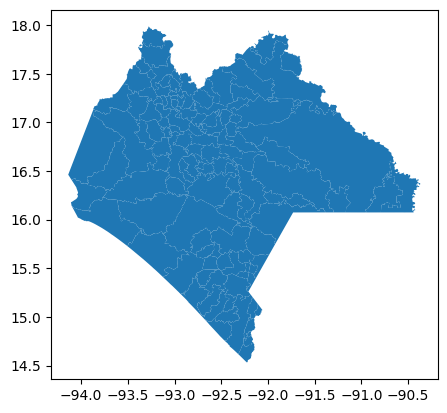

In [23]:
## Graficamos Al estado de Chiapas
gdf_chiapas.plot()

<Axes: >

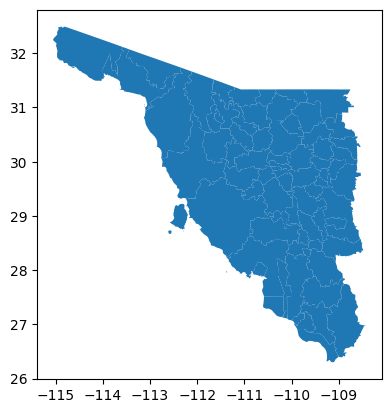

In [24]:
## Graficamos al Estado de Sonora
gdf_sonora.plot()

<Axes: >

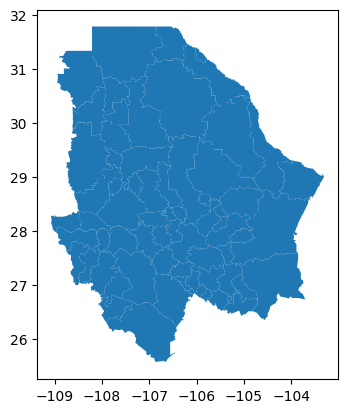

In [25]:
## Graficamos al Estado de Chihuahua
gdf_chihuahua.plot()

### Nos quedamos con los municipios de los casos de estudio

In [26]:
guachochi = gdf_chihuahua.query("CVEGEO=='08027'")
etchojoa = gdf_sonora.query("CVEGEO=='26026'")
trinitaria = gdf_chiapas.query("CVEGEO=='07099'")

<Axes: >

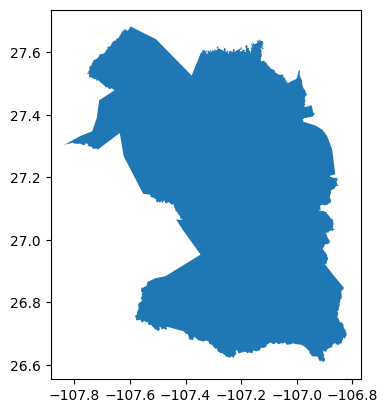

In [27]:
guachochi.plot()

<Axes: >

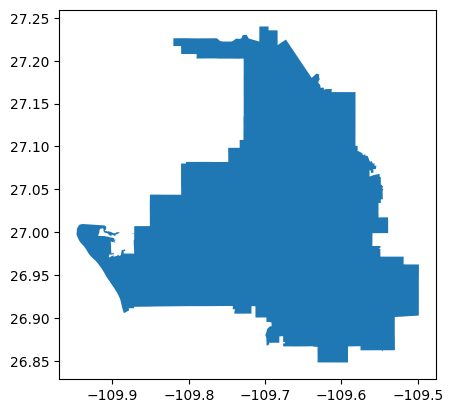

In [28]:
etchojoa.plot()

In [29]:
## Creamos polígonos con los límites del municipio
from shapely.geometry import Point, Polygon, LineString

def crea_poligono(xmin, ymin, xmax, ymax):
    return Polygon([
        (xmax+0.1, ymin-0.1),
        (xmax+0.1, ymax+0.1),
        (xmin-0.1, ymax+0.1),
        (xmin-0.1, ymin-0.1),
    ])

limites_trinitaria = crea_poligono(*trinitaria.total_bounds)
limites_guachochi = crea_poligono(*guachochi.total_bounds)
limites_etchojoa = crea_poligono(*etchojoa.total_bounds)

In [30]:
## Guardamos los límites de los municipios

TRINITARIA_BOX_FP = build_path([CHIAPAS_PATH, "trinitaria_box.geojson"])
ETCHOJOA_BOX_FP = build_path([SONORA_PATH, "etchojoa_box.geojson"])
GUACHOCHI_BOX_FP = build_path([CHIHUAHUA_PATH, "guachochi_box.geojson"])

df_limites_trinitaria = gpd.GeoDataFrame({'municipio' : ["La Trinitaria"],  'geometry': [limites_trinitaria]},crs="EPSG:4326")
df_limites_etchojoa = gpd.GeoDataFrame({'municipio' : ["Etchojoa"],  'geometry': [limites_etchojoa]},crs="EPSG:4326")
df_limites_guachochi = gpd.GeoDataFrame({'municipio' : ["Guachochi"],  'geometry': [limites_guachochi]},crs="EPSG:4326")

df_limites_trinitaria.to_file(TRINITARIA_BOX_FP, driver="GeoJSON")
df_limites_etchojoa.to_file(ETCHOJOA_BOX_FP, driver="GeoJSON")
df_limites_guachochi.to_file(GUACHOCHI_BOX_FP, driver="GeoJSON")

## Masking a raster using a shapefile

In [31]:
### Cortamos los raster correspondientes a los límites de los municipios a analizar
edos_explanatory_rasters = {"chiapas" : [],
                            "sonora" : [],
                            "chihuahua" : []}

explanatory_rasters_30s = [i.replace("2.5m", "30s") for i in explanatory_rasters]

def crop_rasters(shape_box, estado):
    with fiona.open(shape_box, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

        for raster_data in explanatory_rasters_30s:
            with rasterio.open(raster_data) as src:
                    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
                    out_meta = src.meta
                    out_meta.update({"driver": "GTiff",
                                 "height": out_image.shape[1],
                                 "width": out_image.shape[2],
                                 "transform": out_transform})

                    CROP_RASTER_FP = build_path([CASOS_ESTUDIO_PATH, estado, "rasters", raster_data.replace(".tif", "_crop.tif").split("/")[-1]])
                    with rasterio.open(CROP_RASTER_FP, "w", **out_meta) as dest:
                        dest.write(out_image)

                    edos_explanatory_rasters[estado].append(CROP_RASTER_FP)

boxes_estados = { "chiapas" : TRINITARIA_BOX_FP, "sonora" : ETCHOJOA_BOX_FP, "chihuahua": GUACHOCHI_BOX_FP}

for estado,box in boxes_estados.items():
    crop_rasters(box, estado)

## Calculo de probabilidades de factibilidad a partir de los raster de los municipios

In [32]:
# Rutas donde se guardarán las salidas de las probabilidades
salidas_path_estados = {
    "chiapas" : build_path([CHIAPAS_PATH, "outputs"]),
    "sonora" : build_path([SONORA_PATH, "outputs"]),
    "chihuahua" : build_path([CHIHUAHUA_PATH, "outputs"])
}

# Load target raster data for each municipio

for estado, salida_path in salidas_path_estados.items():
    target_xs, raster_info = load_targets(edos_explanatory_rasters[estado])
    if estado == "chiapas":
        impute(target_xs, best_viento_model, raster_info, outdir=salida_path,
                linechunk=400, class_prob=True, certainty=True)
    else:
        impute(target_xs, best_solar_model, raster_info, outdir=salida_path,
                linechunk=400, class_prob=True, certainty=True)

In [33]:
### Carga raster
PROBABILITY = build_path([salidas_path_estados["sonora"], "probability_1.tif"])
raster = rxr.open_rasterio(PROBABILITY, mask_and_scale=True)

### Selecciona datos en banda 1
raster =  raster.sel(band=1)

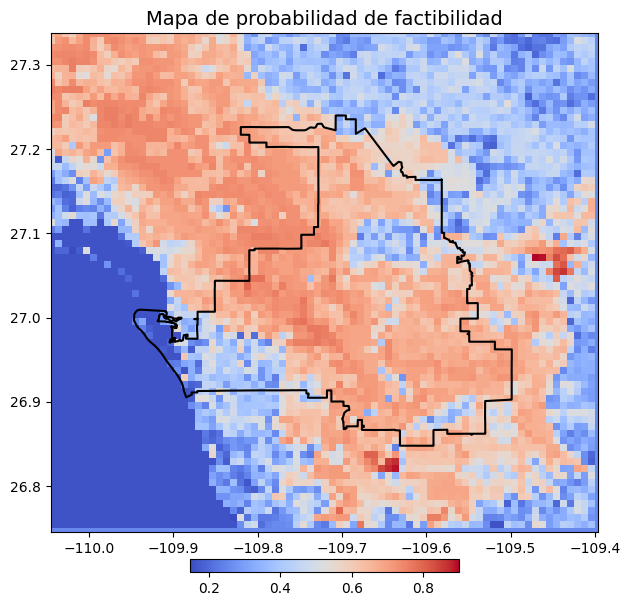

In [34]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax, add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)

etchojoa.boundary.plot(ax=ax, markersize=5, color = "black")
ax.set_xlim([raster.x.min(), raster.x.max()])
ax.set_ylim([raster.y.min(), raster.y.max()])
ax.set_title(f'Mapa de probabilidad de factibilidad', fontsize = 14)
ax.set_aspect('equal')

plt.show()

In [35]:
## Carga localidades
localidades_guachochi = gpd.read_file(LOCALIDADES_GUACHOCHI_PATH)
localidades_etchojoa = gpd.read_file(LOCALIDADES_ETCHOJOA_PATH)
localidades_trinitaria = gpd.read_file(LOCALIDADES_TRINITARIA_PATH)


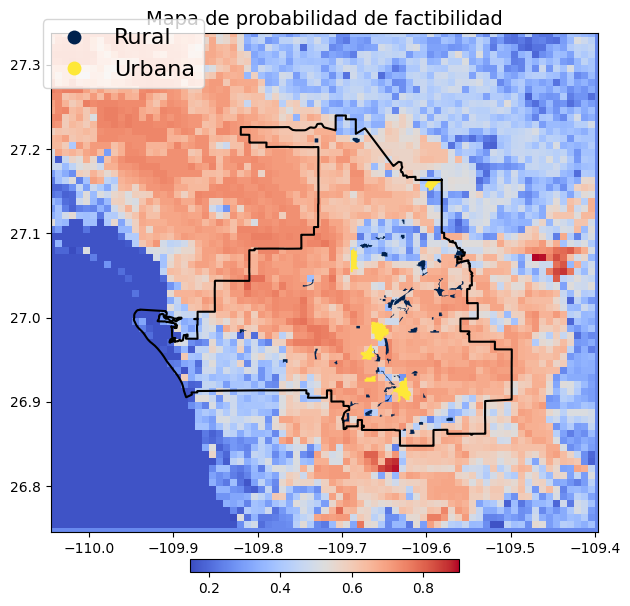

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 7)

cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.025,
    'pad': 0.05,
    'extend':'neither'
}

raster.plot.imshow(
    ax=ax, add_labels=False,
    cmap='coolwarm', cbar_kwargs=cbar_kwargs)

ax_localidades_etchojoa = localidades_etchojoa.plot(column='AMBITO', categorical=True, cmap = "cividis",legend=True, legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':16,'frameon':True}, ax=ax)


etchojoa.boundary.plot(ax=ax_localidades_etchojoa , markersize=5, color = "black")
ax.set_xlim([raster.x.min(), raster.x.max()])
ax.set_ylim([raster.y.min(), raster.y.max()])
ax.set_title(f'Mapa de probabilidad de factibilidad', fontsize = 14)
ax.set_aspect('equal')

plt.show()




## Graficamos con Contextily

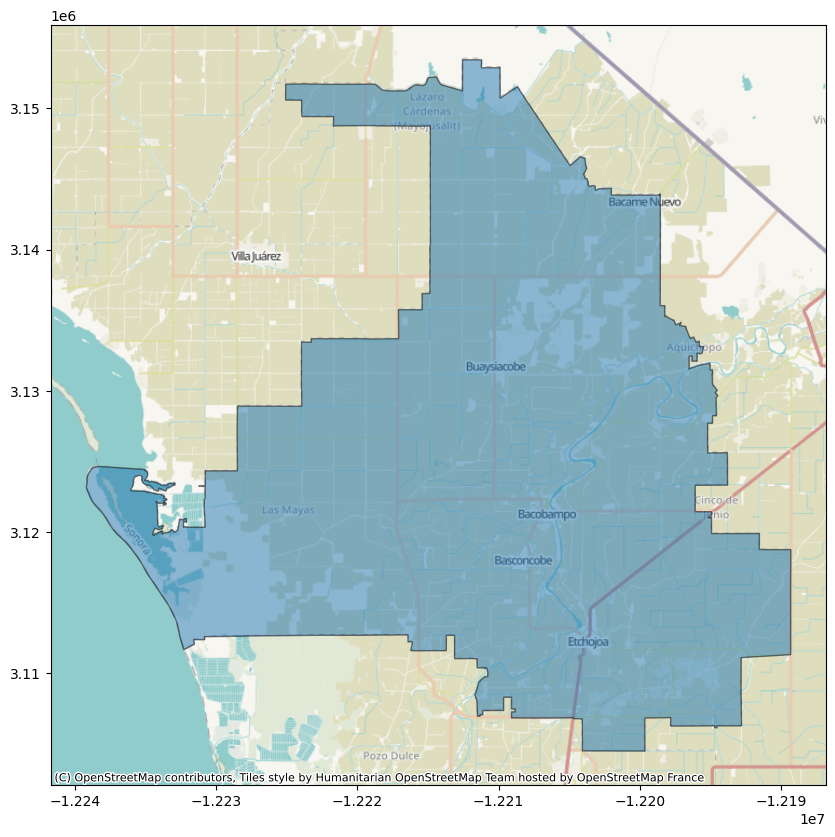

In [37]:
### Carga raster
import contextily as cx
PROBABILITY_REP = build_path([salidas_path_estados["sonora"], "probability_1_reprojected.tif"])

df_wm = etchojoa.to_crs(epsg=3857)
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax)




## Carguemos los geojson de los tiff de probabilidades de factibilidad reclasificado

In [71]:
## Definimos rutas de los archivos
PROBA_RECLASIFIDADA_TRINITARIA_FP = build_path([CHIAPAS_PATH, "outputs", "probability_1.geojson"])
PROBA_RECLASIFIDADA_ETCHOJOA_FP = build_path([SONORA_PATH, "outputs", "probability_1.geojson"])
PROBA_RECLASIFIDADA_GUACHOCHI_FP = build_path([CHIHUAHUA_PATH, "outputs", "probability_1.geojson"])

## Cargamos datos
proba_rec_trinitaria = gpd.read_file(PROBA_RECLASIFIDADA_TRINITARIA_FP)
proba_rec_etchojoa = gpd.read_file(PROBA_RECLASIFIDADA_ETCHOJOA_FP)
proba_rec_guanochi = gpd.read_file(PROBA_RECLASIFIDADA_GUACHOCHI_FP)


## Grafiquemos el área de cobertura de los pixeles con la probabilidad de factibilidad en los últimos quantiles de la distribución

### Trinitaria

Text(0.5, 1.0, 'Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria')

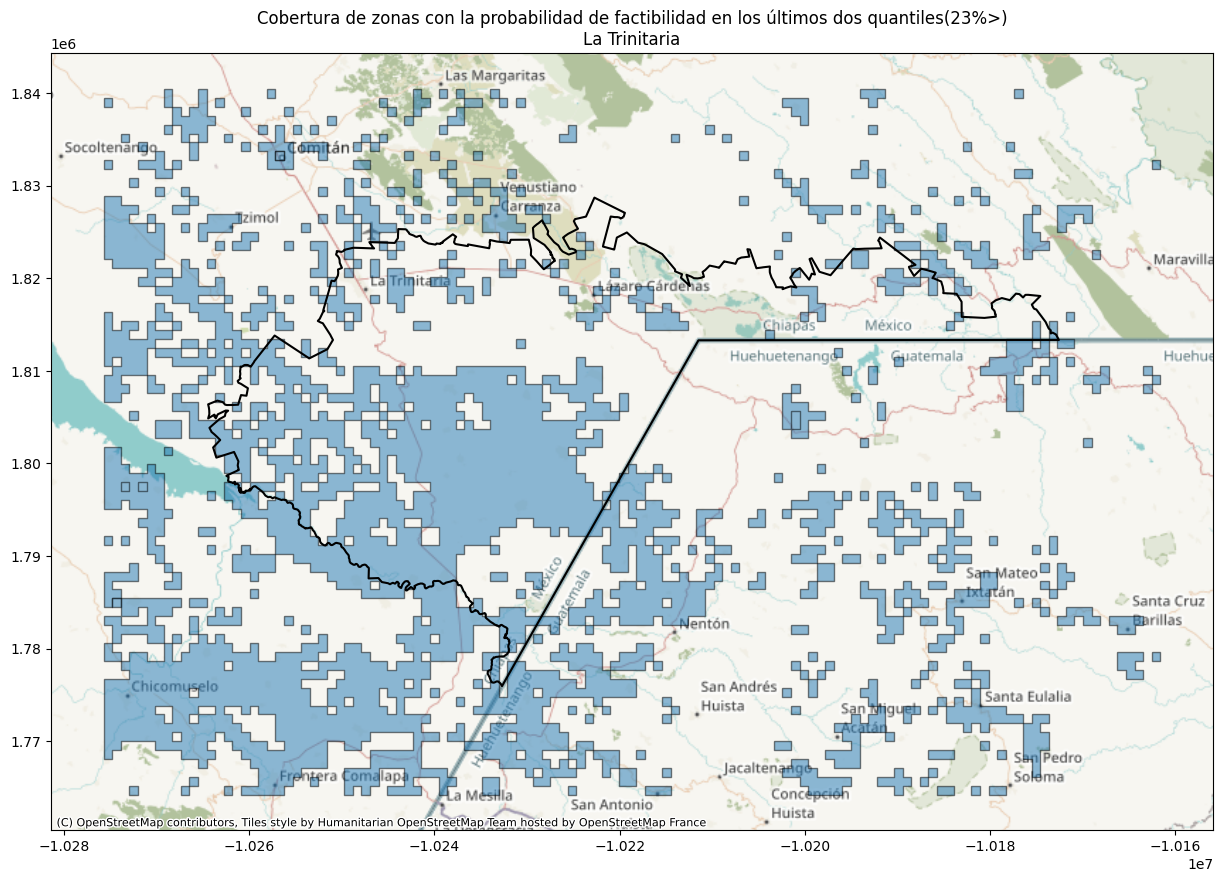

In [73]:
## Trinitaria
proba_rec_trinitaria_wm = proba_rec_trinitaria.query("quantil=='23-66' or quantil=='66-100'").to_crs(epsg=3857)

ax = trinitaria.to_crs(epsg=3857).boundary.plot(
    ax = proba_rec_trinitaria_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria")


## Etchojoa

Text(0.5, 1.0, 'Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(50%>)\nEtchojoa')

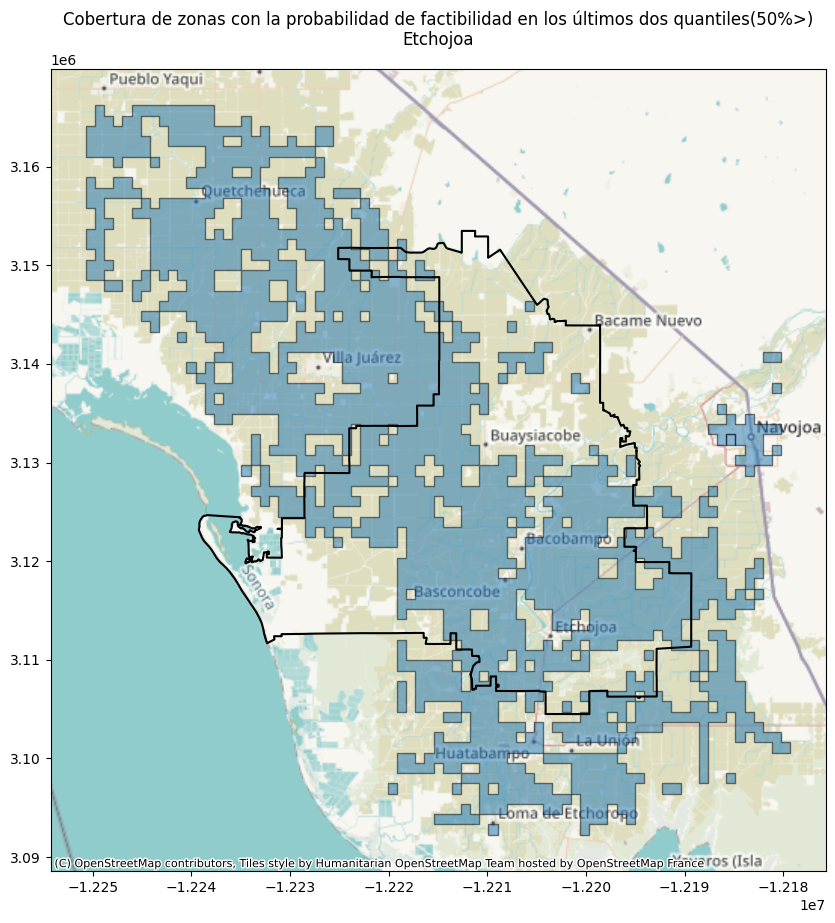

In [75]:
## Etchojoa
proba_rec_etchojoa_wm = proba_rec_etchojoa.query("quantil=='50-68' or quantil=='68-88'").to_crs(epsg=3857)

ax = etchojoa.to_crs(epsg=3857).boundary.plot(
    ax = proba_rec_etchojoa_wm.plot(figsize = (10,12), alpha=0.5, edgecolor="k"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(50%>)\nEtchojoa")


## Guachochi

Text(0.5, 1.0, 'Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(50%>)\nGuachochi')

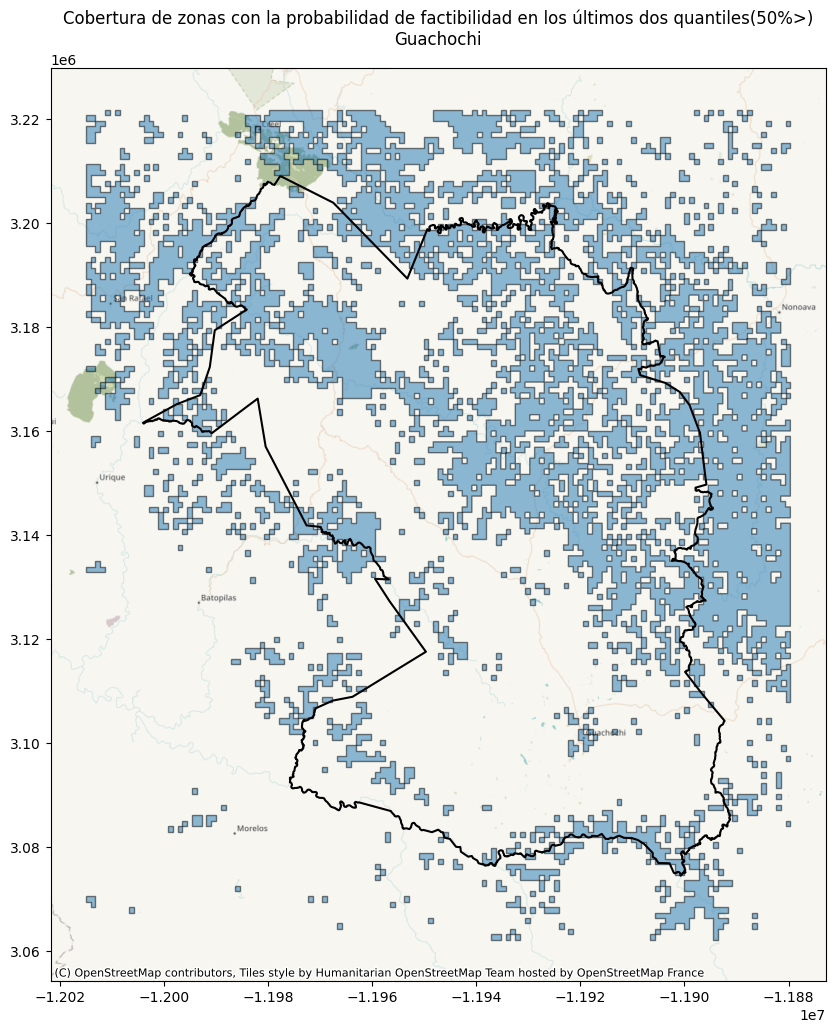

In [79]:
## Guachochi
proba_rec_guanochi_wm = proba_rec_guanochi.query("quantil=='43-51' or quantil=='51-79'").to_crs(epsg=3857)

ax = guachochi.to_crs(epsg=3857).boundary.plot(
    ax = proba_rec_guanochi_wm.plot(figsize = (10,12), alpha=0.5, edgecolor="k"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Cobertura de zonas con la probabilidad de factibilidad en los últimos dos quantiles(50%>)\nGuachochi")



## CARACTERIZACIÓN SOCIO-DEMOGRÁFICA DE LA POBLACIÓN CON RIESGO DE CONFLICTO

**Pregunta a responder : ¿Cuál es la caracterización sociodemográfica de las AGEBS que caen en la zona de factibilidad?**

Responderemos a esta pregunta con datos del Censo de Población y Vivienda.

Los datos del censo de población y vivienda se encuentran en la siguiente liga:

[Censo de Población y Vivienda 2020](https://www.inegi.org.mx/programas/ccpv/2020/default.html#Microdatos)


In [148]:
## Definimos rutas de los datos del censo de los casos de estudio

CENSO_TRINITARIA_FP = build_path([CHIAPAS_PATH, "censo", "RESAGEBURB_07_2020_csv.zip"])
CENSO_GUACHOCHI_FP = build_path([CHIHUAHUA_PATH, "censo", "RESAGEBURB_08_2020_csv.zip"])
CENSO_ETCHOJOA_FP = build_path([SONORA_PATH, "censo", "RESAGEBURB_26_2020_csv.zip"])

TRINITARIA_AGEBS_FP = build_path([CHIAPAS_PATH, "la_trinitaria_agebs.geojson"])
GUACHOCHI_AGEBS_FP = build_path([CHIHUAHUA_PATH, "guachochi_agebs.geojson"])
ETCHOJOA_AGEBS_FP = build_path([SONORA_PATH, "etchojoa_agebs.geojson"])

## Cargamos datos del censo
censo_trinitaria = pd.read_csv(CENSO_TRINITARIA_FP)
censo_guachochi = pd.read_csv(CENSO_GUACHOCHI_FP)
censo_etchojoa = pd.read_csv(CENSO_ETCHOJOA_FP)

In [86]:
## Cargamos agebs de cada municipio
agebs_trinitaria = gpd.read_file(TRINITARIA_AGEBS_FP)
agebs_guachochi = gpd.read_file(GUACHOCHI_AGEBS_FP)
agebs_etchojoa  = gpd.read_file(ETCHOJOA_AGEBS_FP) 


In [149]:
## Generamos la llave primaria CVEGEO para hacer merge entre los datos del censo y la información del censo
def agrega_campos(datos):
    datos.loc[:, "CVE_ENT" ]= datos["ENTIDAD"].apply(lambda x: f"{x:02d}")
    datos.loc[:, "CVE_MUN"] = datos["MUN"].apply(lambda x: f"{x:03d}")
    datos.loc[:, "CVE_LOC"] = datos["LOC"]	.apply(lambda x: f"{x:04d}")
    datos.loc[:, "CVE_AGEB"]= datos["AGEB"]
    datos.loc[:, "CVEGEO"] = datos["CVE_ENT"] + datos["CVE_MUN"] + datos ["CVE_LOC"] + datos["CVE_AGEB"]
    
    datos.drop(columns = ["ENTIDAD", "NOM_ENT", "MUN", "NOM_MUN", "LOC", "NOM_LOC", "AGEB", "MZA", "CVE_ENT", "CVE_MUN", "CVE_LOC", "CVE_AGEB"], inplace = True)

    return datos
    

censo_guachochi = agrega_campos(censo_guachochi.query("AGEB!='0000' and MZA!=0")) 
censo_trinitaria = agrega_campos(censo_trinitaria.query("AGEB!='0000' and MZA!=0"))
censo_etchojoa = agrega_campos(censo_etchojoa.query("AGEB!='0000' and MZA!=0"))


/tmp/ipykernel_1656162/2706810018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.loc[:, "CVE_ENT" ]= datos["ENTIDAD"].apply(lambda x: f"{x:02d}")
/tmp/ipykernel_1656162/2706810018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos.loc[:, "CVE_MUN"] = datos["MUN"].apply(lambda x: f"{x:03d}")
/tmp/ipykernel_1656162/2706810018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [159]:
### Agrupamos valores
censo_guachochi = censo_guachochi.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()
censo_etchojoa = censo_etchojoa.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()
censo_trinitaria = censo_trinitaria.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()


In [164]:
### Hacemos merge entre el censo y los agebs
censo_agebs_guachochi = agebs_guachochi.merge(right=censo_guachochi, on = "CVEGEO", how="inner")
censo_agebs_etchojoa = agebs_etchojoa.merge(right=censo_etchojoa, on = "CVEGEO", how="inner")
censo_agebs_trinitaria = agebs_trinitaria.merge(right=censo_trinitaria, on = "CVEGEO", how="inner")


## ¿Qué agebs se encuentran en las zonas de factibilidad?

In [175]:
### Construimos un sólo polígono para identificar los agebs que están dentro del área de cobertura
proba_rec_guanochi_factibilidad = proba_rec_guanochi.query("quantil=='43-51' or quantil=='51-79'")
proba_rec_trinitaria_factibilidad = proba_rec_trinitaria.query("quantil=='23-66' or quantil=='66-100'")
proba_rec_etchojoa_factibilidad =proba_rec_etchojoa.query("quantil=='50-68' or quantil=='68-88'")

proba_rec_etchojoa_factibilidad["Zona"] = "factible"
proba_rec_trinitaria_factibilidad["Zona"] = "factible"
proba_rec_guanochi_factibilidad["Zona"] = "factible"

proba_rec_guanochi_factibilidad = proba_rec_guanochi_factibilidad.dissolve(by='Zona')
proba_rec_trinitaria_factibilidad = proba_rec_trinitaria_factibilidad.dissolve(by='Zona')
proba_rec_etchojoa_factibilidad = proba_rec_etchojoa_factibilidad.dissolve(by='Zona')



/home/milo/anaconda3/envs/reto-ltp/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/milo/anaconda3/envs/reto-ltp/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/milo/anaconda3/envs/reto-ltp/lib/python3.11/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

## Los siguientes data frames contienen las agebs que están dentro de las zonas de cobertura de factibilidad


In [187]:
### Los siguientes data frames contienen las agebs que están dentro de las zonas de cobertura de factibilidad
censo_agebs_trinitaria_factibilidad = censo_agebs_trinitaria[[proba_rec_trinitaria_factibilidad.contains(i)["factible"] for i in censo_agebs_trinitaria.geometry ]]
censo_agebs_etchojoa_factibilidad = censo_agebs_etchojoa[[proba_rec_etchojoa_factibilidad.contains(i)["factible"] for i in censo_agebs_etchojoa.geometry ]]
censo_agebs_guachochi_factibilidad = censo_agebs_guachochi[[proba_rec_guanochi_factibilidad.contains(i)["factible"] for i in censo_agebs_guachochi.geometry ]]


## Graficamos las agebs a investigar

### Trinitaria

Text(0.5, 1.0, 'AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria')

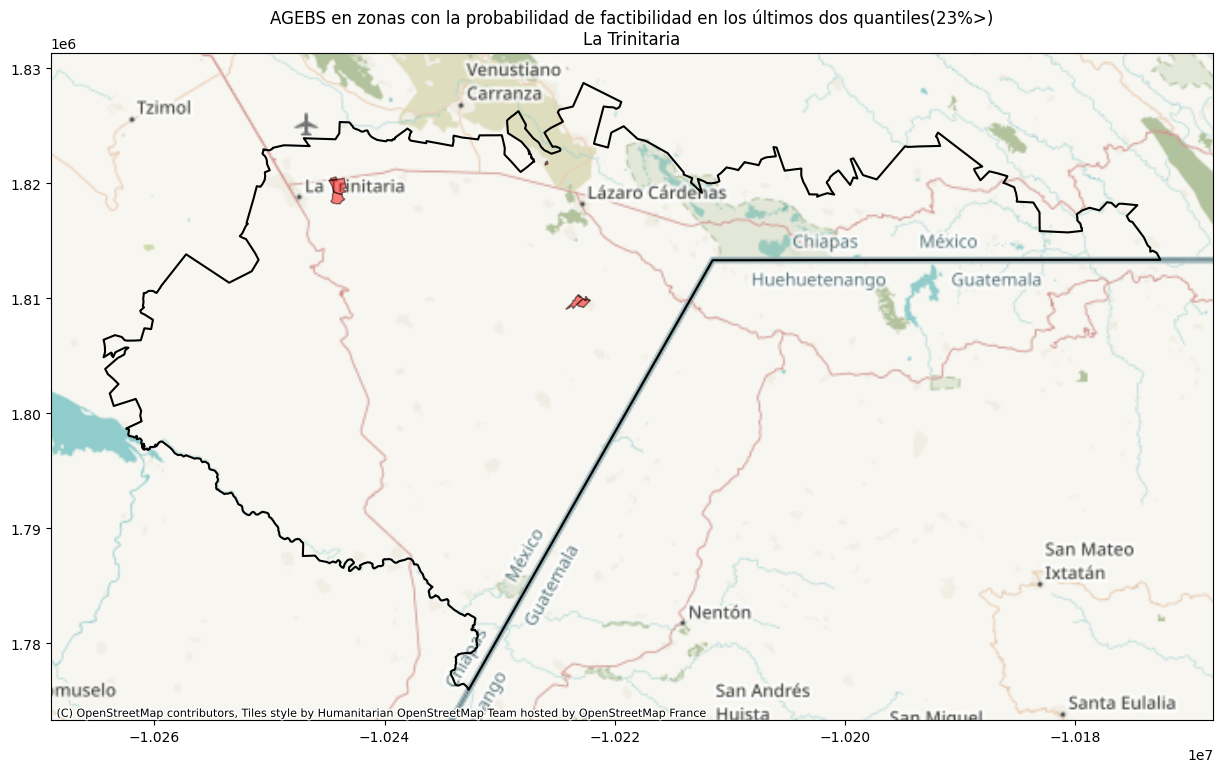

In [192]:
## Trinitaria
censo_agebs_trinitaria_factibilidad_wm = censo_agebs_trinitaria_factibilidad.to_crs(epsg=3857)

ax = trinitaria.to_crs(epsg=3857).boundary.plot(
    ax = censo_agebs_trinitaria_factibilidad_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria")


### Guachochi

Text(0.5, 1.0, 'AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nGuachochi')

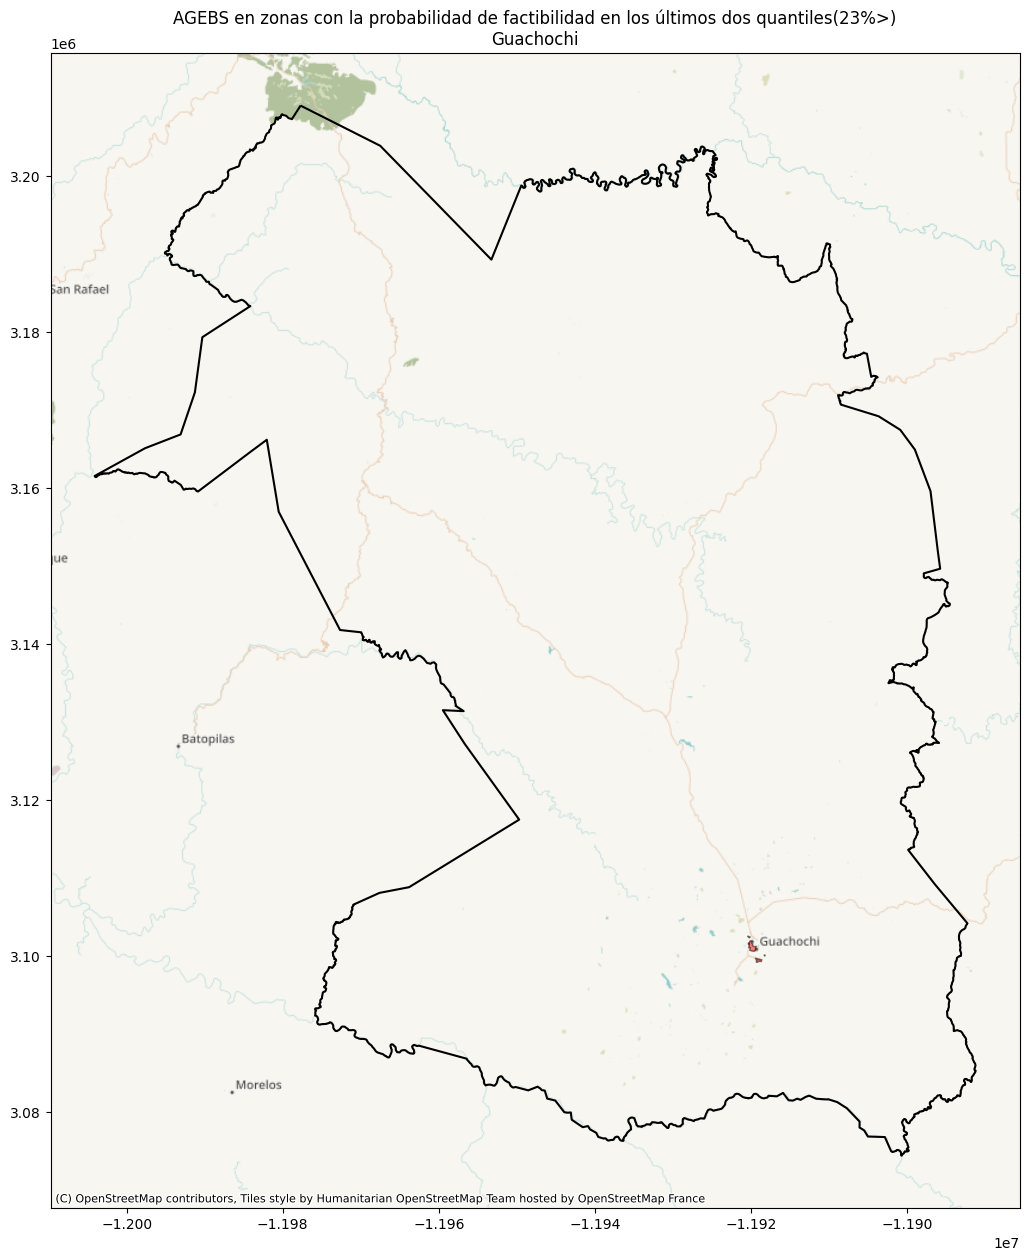

In [193]:
## Guachochi
censo_agebs_guachochi_factibilidad_wm = censo_agebs_guachochi_factibilidad.to_crs(epsg=3857)

ax = guachochi.to_crs(epsg=3857).boundary.plot(
    ax = censo_agebs_guachochi_factibilidad_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nGuachochi")


### Etchojoa

Text(0.5, 1.0, 'AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nEtchojoa')

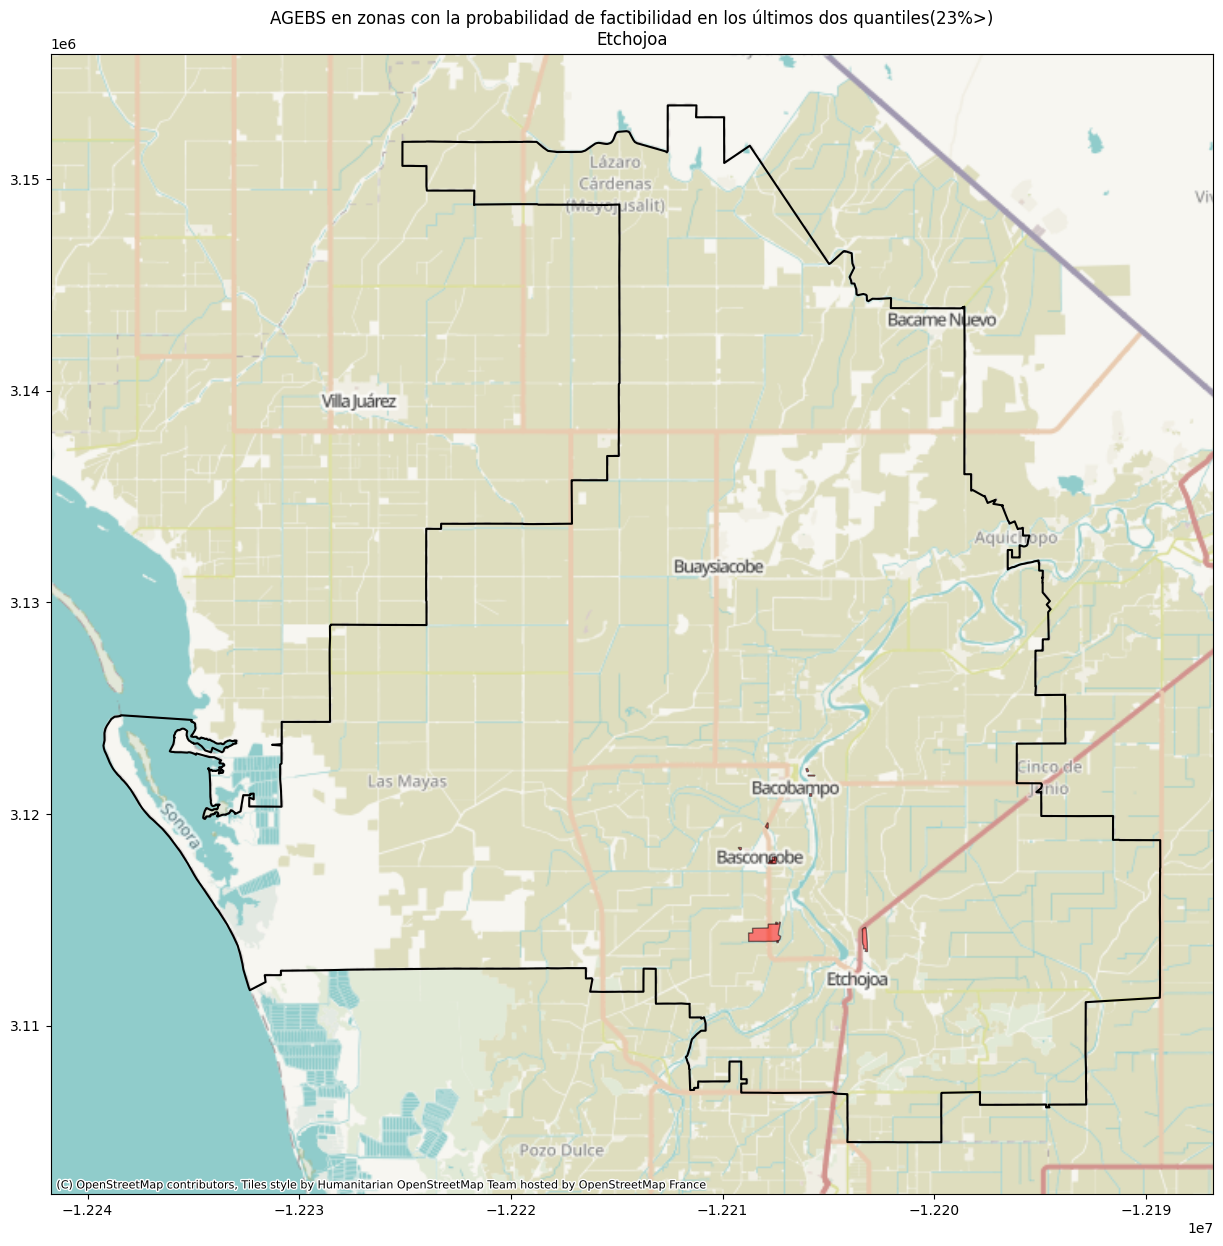

In [194]:
## Etchojoa
censo_agebs_etchojoa_factibilidad_wm = censo_agebs_etchojoa_factibilidad.to_crs(epsg=3857)

ax = etchojoa.to_crs(epsg=3857).boundary.plot(
    ax = censo_agebs_etchojoa_factibilidad_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("AGEBS en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nEtchojoa")


## CARACTERIZACIÓN SOCIO-DEMOGRÁFICA DE LA POBLACIÓN CON RIESGO DE CONFLICTO (A NIVEL LOCALIDAD)

**Pregunta a responder : ¿Cuál es la caracterización sociodemográfica de las Localidades que caen en la zona de factibilidad?**

Responderemos a esta pregunta con datos del Censo de Población y Vivienda.


In [203]:
## Definimos rutas de los datos del censo de los casos de estudio

## Datos localidades del censo
CENSO_LOC_TRINITARIA_FP = build_path([CHIAPAS_PATH, "censo", "iter_07_2020_csv.zip"])
CENSO_LOC_GUACHOCHI_FP = build_path([CHIHUAHUA_PATH, "censo", "iter_08_2020_csv.zip"])
CENSO_LOC_ETCHOJOA_FP = build_path([SONORA_PATH, "censo", "iter_26_2020_csv.zip"])

## Geojson de localidades urbanas y rurales manzanadas
TRINITARIA_LOC_URB_RUR_FP = build_path([CHIAPAS_PATH, "loc_urb_rur_la_trinitaria.geojson"])
GUACHOCHI_LOC_URB_RUR_FP = build_path([CHIHUAHUA_PATH, "loc_urb_rur_guachochi.geojson"])
ETCHOJOA_LOC_URB_RUR_FP = build_path([SONORA_PATH, "loc_urb_rur_etchojoa.geojson"])

## Geojson de localidades rurales manzanadas y no manzanadas
TRINITARIA_LOC_RUR_FP = build_path([CHIAPAS_PATH, "loc_rur_la_trinitaria.geojson"])
GUACHOCHI_LOC_RUR_FP = build_path([CHIHUAHUA_PATH, "loc_rur_guachochi.geojson"])
ETCHOJOA_LOC_RUR_FP = build_path([SONORA_PATH, "loc_rur_etchojoa.geojson"])



In [228]:
## Cargamos datos del censo
def agrega_campos_loc(datos):
    datos.loc[:, "CVE_ENT" ]= datos["ENTIDAD"].apply(lambda x: f"{x:02d}")
    datos.loc[:, "CVE_MUN"] = datos["MUN"].apply(lambda x: f"{x:03d}")
    datos.loc[:, "CVE_LOC"] = datos["LOC"]	.apply(lambda x: f"{x:04d}")
    datos.loc[:, "CVEGEO"] = datos["CVE_ENT"] + datos["CVE_MUN"] + datos ["CVE_LOC"] 
    
    datos.drop(columns = ["ENTIDAD", "NOM_ENT", "MUN", "NOM_MUN", "LOC", "NOM_LOC",  "CVE_ENT", "CVE_MUN", "CVE_LOC", "LONGITUD", "LATITUD", "ALTITUD"], inplace = True)

    return datos
    
censo_loc_trinitaria = agrega_campos_loc(pd.read_csv(CENSO_LOC_TRINITARIA_FP))
censo_loc_guachochi = agrega_campos_loc(pd.read_csv(CENSO_LOC_GUACHOCHI_FP))
censo_loc_etchojoa = agrega_campos_loc(pd.read_csv(CENSO_LOC_ETCHOJOA_FP))


In [232]:
## Agrupamos y sustituimos valores
censo_loc_etchojoa = censo_loc_etchojoa.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()
censo_loc_guachochi = censo_loc_guachochi.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()
censo_loc_trinitaria = censo_loc_trinitaria.set_index("CVEGEO").replace("*", 0).replace("N/D", 0).astype(float).groupby("CVEGEO").sum().reset_index()


In [204]:
## Cargamos localidades urbanas y rurales de cada municipio
loc_urb_rur_trinitaria = gpd.read_file(TRINITARIA_LOC_URB_RUR_FP)
loc_urb_rur_guachochi = gpd.read_file(GUACHOCHI_LOC_URB_RUR_FP)
loc_urb_rur_etchojoa  = gpd.read_file(ETCHOJOA_LOC_URB_RUR_FP) 


In [ ]:
## Cargamos localidades rurales de cada municipio
loc_rur_trinitaria = gpd.read_file(TRINITARIA_LOC_RUR_FP)
loc_rur_guachochi = gpd.read_file(GUACHOCHI_LOC_RUR_FP)
loc_rur_etchojoa  = gpd.read_file(ETCHOJOA_LOC_RUR_FP)

## Los siguientes data frames contienen las localidades urbanas y rurales que están dentro de las zonas de cobertura de factibilidad


In [219]:
### Los siguientes data frames contienen las localidades urbanas y rurales que están dentro de las zonas de cobertura de factibilidad
loc_urb_rur_trinitaria_conflicto = loc_urb_rur_trinitaria[[proba_rec_trinitaria_factibilidad.contains(i)["factible"] for i in loc_urb_rur_trinitaria.geometry ]]
loc_urb_rur_guachochi_conflicto = loc_urb_rur_guachochi[[proba_rec_guanochi_factibilidad.contains(i)["factible"] for i in loc_urb_rur_guachochi.geometry ]]
loc_urb_rur_etchojoa_conflicto = loc_urb_rur_etchojoa[[proba_rec_etchojoa_factibilidad.contains(i)["factible"] for i in loc_urb_rur_etchojoa.geometry ]]


In [241]:
### Agregamos información del censo

loc_urb_rur_guachochi_conflicto = loc_urb_rur_guachochi_conflicto.merge(right=censo_loc_guachochi, on="CVEGEO", how="inner")
loc_urb_rur_trinitaria_conflicto = loc_urb_rur_trinitaria_conflicto.merge(right=censo_loc_trinitaria, on="CVEGEO", how="inner")
loc_urb_rur_etchojoa_conflicto = loc_urb_rur_etchojoa_conflicto.merge(right=censo_loc_etchojoa, on="CVEGEO", how="inner")


## Graficamos las localidades urbanas y rurales a investigar

### Trinitaria

Text(0.5, 1.0, 'Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria')

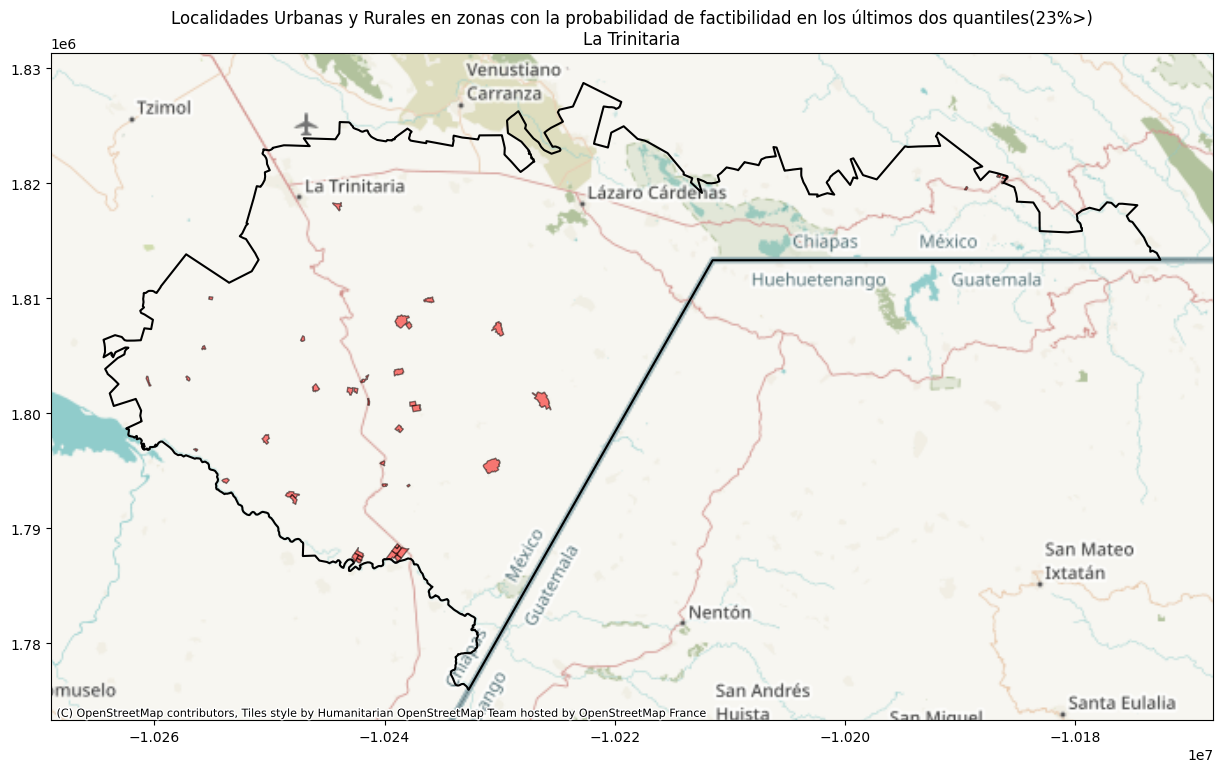

In [243]:
## Trinitaria
loc_urb_rur_trinitaria_conflicto_wm = loc_urb_rur_trinitaria_conflicto.to_crs(epsg=3857)

ax = trinitaria.to_crs(epsg=3857).boundary.plot(
    ax = loc_urb_rur_trinitaria_conflicto_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nLa Trinitaria")


### Guachochi

Text(0.5, 1.0, 'Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nGuachochi')

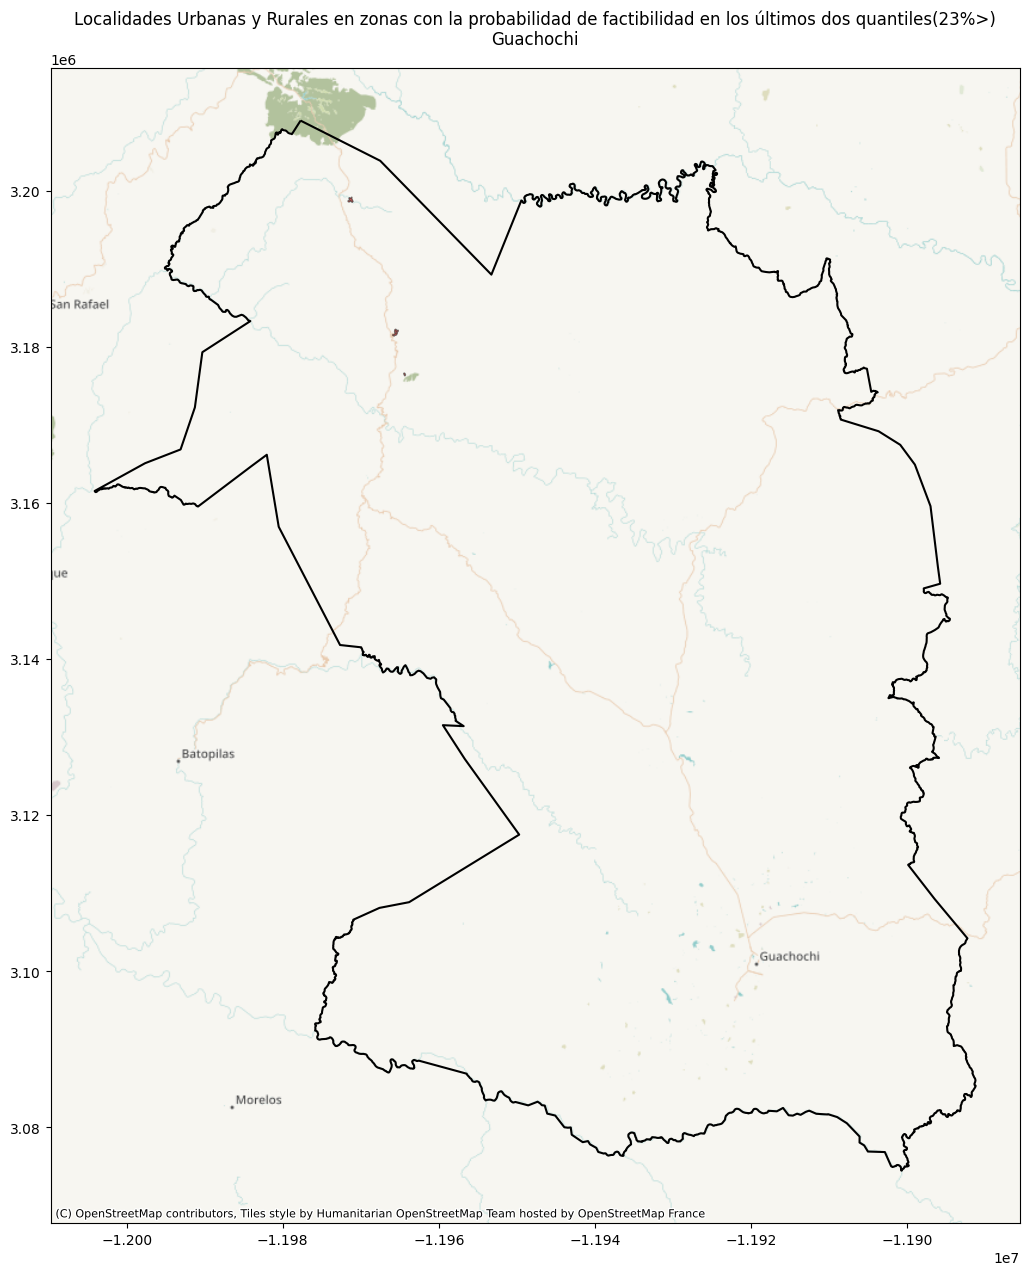

In [244]:
## Guachochi
loc_urb_rur_guachochi_conflicto_wm = loc_urb_rur_guachochi_conflicto.to_crs(epsg=3857)

ax = guachochi.to_crs(epsg=3857).boundary.plot(
    ax = loc_urb_rur_guachochi_conflicto_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nGuachochi")


### Etchojoa

Text(0.5, 1.0, 'Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nEtchojoa')

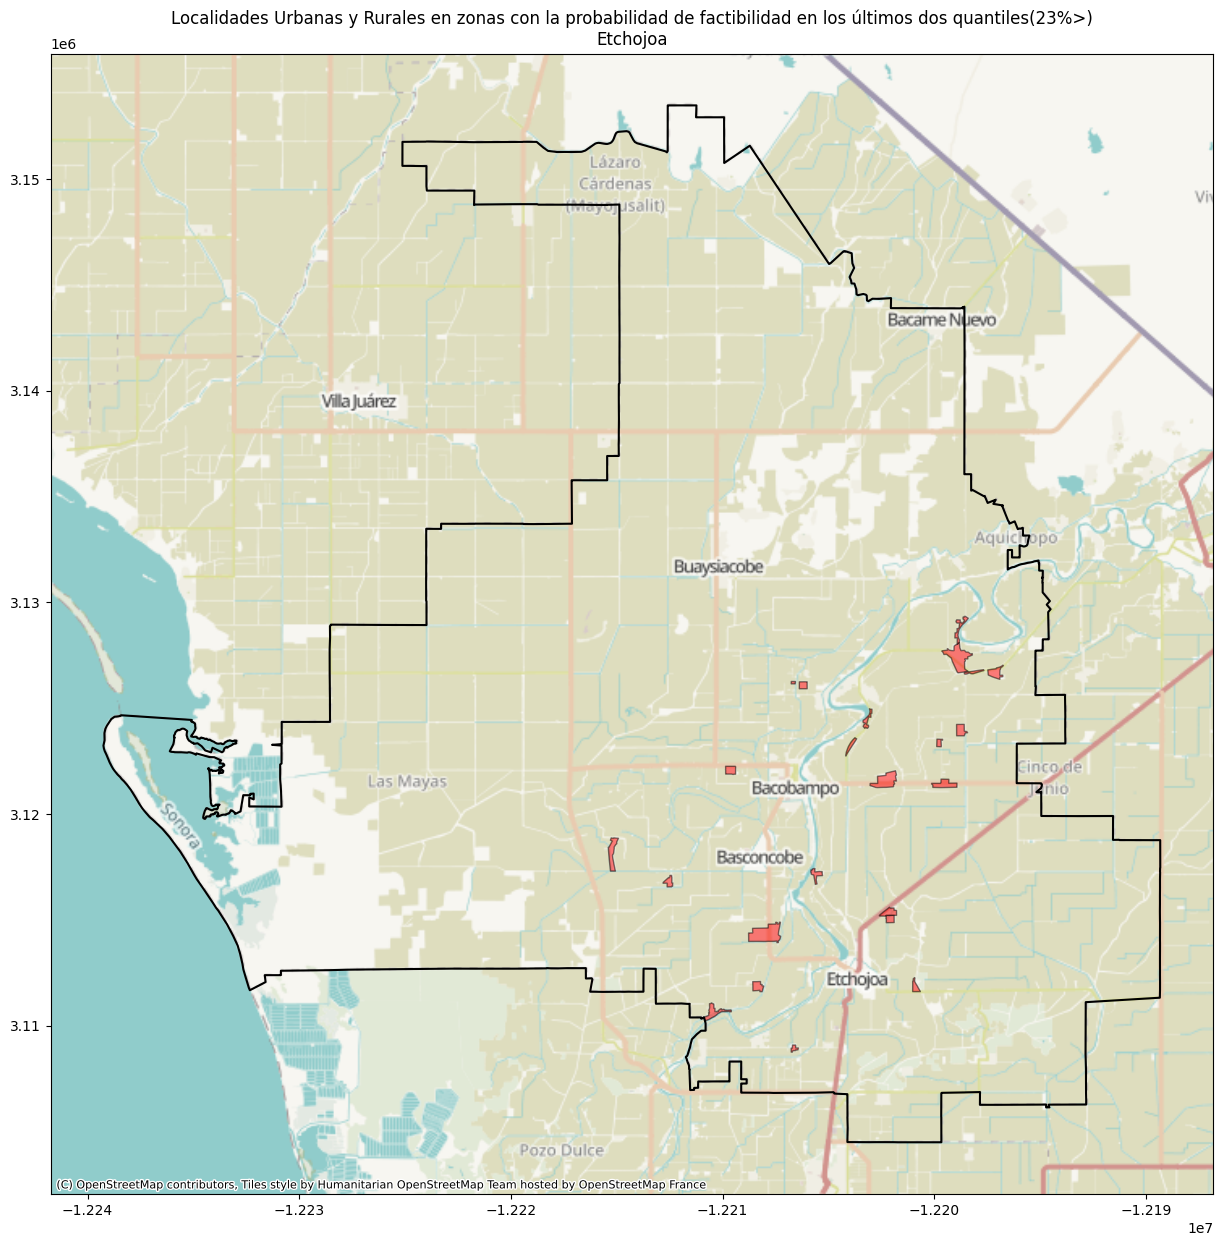

In [246]:
## Guachochi
loc_urb_rur_etchojoa_conflicto_wm = loc_urb_rur_etchojoa_conflicto.to_crs(epsg=3857)

ax = etchojoa.to_crs(epsg=3857).boundary.plot(
    ax = loc_urb_rur_etchojoa_conflicto_wm.plot(figsize = (15,15), alpha=0.5, edgecolor="k", color ="red"),
    color = "black"
)

cx.add_basemap(ax)
plt.title("Localidades Urbanas y Rurales en zonas con la probabilidad de factibilidad en los últimos dos quantiles(23%>)\nEtchojoa")


## Reproyectamos los rasters de probabilidad de factibilidad

In [ ]:
from rasterio.crs import CRS
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:3857'


for estado in estados:
    in_raster_file = build_path([salidas_path_estados[estado], "probability_1.tif"])
    out_raster_file = build_path([salidas_path_estados[estado], "probability_1_reprojected.tif"])

    with rasterio.open(in_raster_file) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
    
        with rasterio.open(out_raster_file, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)
